<a href="https://colab.research.google.com/github/adilghafir/adil-project/blob/main/lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variance expliquée par chaque composante LDA : [1.]
Coefficients des discriminants linéaires : [[2.62631446 1.01201992]]


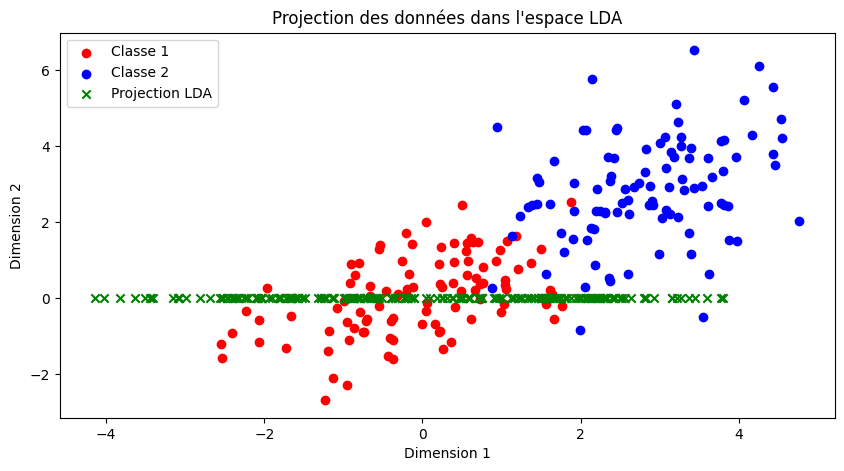

Nouvelles données : [[ 0.40134606 -0.11589699]
 [ 1.76666318  1.35629282]
 [-0.76853845  1.35548179]
 [ 1.81451982  1.05892559]
 [ 0.81494633  0.19235151]]
Données projetées dans l'espace LDA : [[-1.28808091]
 [ 0.28506907]
 [-1.77884825]
 [ 0.2307503 ]
 [-0.85472153]]
Prédictions : [0. 1. 0. 1. 0.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Générer des données aléatoires pour l'exemple
np.random.seed(0)

# Données de classe 1
mean1 = np.array([0, 0])
cov1 = np.array([[1, 0.5], [0.5, 1]])
data1 = np.random.multivariate_normal(mean1, cov1, 100)

# Données de classe 2
mean2 = np.array([3, 3])
cov2 = np.array([[1, 0.5], [0.5, 2]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Concaténer les données et les étiquettes
X = np.concatenate((data1, data2))
y = np.concatenate((np.zeros(100), np.ones(100)))

# Appliquer la LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Afficher les résultats
print("Variance expliquée par chaque composante LDA :", lda.explained_variance_ratio_)
print("Coefficients des discriminants linéaires :", lda.coef_)

# Visualisation des données et de la projection LDA
plt.figure(figsize=(10, 5))

# Données de classe 1
plt.scatter(data1[:, 0], data1[:, 1], c='r', label='Classe 1')

# Données de classe 2
plt.scatter(data2[:, 0], data2[:, 1], c='b', label='Classe 2')

# Projection dans l'espace LDA
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c='g', marker='x', label='Projection LDA')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Projection des données dans l\'espace LDA')
plt.legend()
plt.show()

# Prédire de nouvelles données
new_data = np.random.multivariate_normal(np.array([1, 1]), np.array([[1, 0], [0, 1]]), 5)
new_data_lda = lda.transform(new_data)
predictions = lda.predict(new_data)

print("Nouvelles données :", new_data)
print("Données projetées dans l'espace LDA :", new_data_lda)
print("Prédictions :", predictions)

